Optimized a step
Optimized a step
Optimized a step
[1 7] : 1.2239999999999465
[2 8] : 1.2239999999999465
[3 8] : 1.000000000000098
[5 1] : 1.015999999998539
[ 6 -1] : 1.6879999999980846
[7 3] : 1.015999999998539


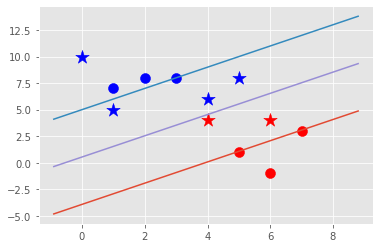

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use("ggplot")

class Support_Vector_Machine:
   def __init__(self, visualization=True):
      self.visualization = visualization
      self.color = {1:"r", -1:"b"}
      if self.visualization:
         self.fig = plt.figure()
         self.ax = self.fig.add_subplot(1,1,1)
   
   def fit(self, data):
      self.data = data
      # ||w||: [w,b]
      opt_dict = {}
      transforms = [[1,1],
                    [-1,1],
                    [-1,-1],
                    [1,-1],]
      
      all_data = []
      for yi in self.data:
         for featureset in self.data[yi]:
            for feature in featureset:
               all_data.append(feature) 

      self.max_feature_value = max(all_data)
      self.min_feature_value = min(all_data)
      all_data = None

      #suprot vectors yi (xi.w+b) = 1 //for both negative and positive "classes/sign" of equation at least to be the nearest to 1 
      step_sizes = [self.max_feature_value * 0.1,
                    self.max_feature_value *0.01,
                    # point of expense:
                    self.max_feature_value * 0.001,]

      # extremely expensive
      b_range_multiple = 5
      # we do not need to take as small steps
      #with b as we do with w
      b_multiple = 5 
      latest_optimum = self.max_feature_value*10

      for step in step_sizes:
         w = np.array([latest_optimum, latest_optimum])
         optimized = False # able, since it convex probelm if no then you should ensure that you will add some further steps.
         while not optimized: 
            for b in np.arange(-1*(self.max_feature_value*b_range_multiple),self.max_feature_value*b_range_multiple,step*b_multiple):
               for transformation in transforms:
                  w_t = w*transformation
                  found_option = True
                  #weakest link in the SVM fundamentally
                  #SMO attempts to ifx this a bit
                  #yi(xi.w+b0) >= 1 
                  for i in self.data:
                     for xi in self.data[i]:
                        yi = i 
                        if not yi*(np.dot(w_t,xi)+b)>= 1:
                           found_option = False
                        #print(xi,":",yi*(np.dot(w_t,xi)+b))
                           #break

                  if found_option:
                     opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                     
            if w[0] < 0:
               optimized = True
               print("Optimized a step")
            else:
               w = w - step # step:= [step, step]
         norms = sorted([n for n in opt_dict])
         #||w|| : [w,b]
         opt_choice = opt_dict[norms[0]]
         self.w = opt_choice[0]
         self.b = opt_choice[1]
         latest_optimum = opt_choice[0][0]+step*2
       
      for i in self.data:
         for xi in self.data[i]:
            yi = i
            print(xi,":",yi*(np.dot(self.w,xi)+self.b))

   def predict(self, features):
      # sign(x.w+b) // sign := is "+" or "-" sign, so this is the classification itself
      classification = np.sign(np.dot(np.array(features),self.w) + self.b) # instead of "np.sign" use lambda/anonymous func
      if classification !=0 and self.visualization:
         self.ax.scatter(features[0],features[1], s=200, marker="*", c=self.color[classification])
      return classification

   def visualize(self):
      [[self.ax.scatter(x[0],x[1],s=100,color=self.color[i]) for x in data_dict[i]] for i in data_dict]
      #hyperplane = x.w+b
      #v= x.w+b
      #psv = 1
      #nsv = -1
      #dec_bound = 0
      def hyperplane(x,w,b,v):
         return (-w[0]*x-b+v) / w[1]

      datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
      hyp_x_min = datarange[0]
      hyp_x_max = datarange[1]

      #(w.x+b) = 1
      #positive support vector hyperplane
      psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
      psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
      self.ax.plot([hyp_x_min, hyp_x_max], [psv1,psv2])

       #(w.x+b) = -1
      #negative support vector hyperplane
      nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
      nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
      self.ax.plot([hyp_x_min, hyp_x_max], [nsv1,nsv2])

       #(w.x+b) = 0
      #boundary support vector hyperplane
      dec_bound1 = hyperplane(hyp_x_min, self.w, self.b, 0)
      dec_bound2 = hyperplane(hyp_x_max, self.w, self.b, 0)
      self.ax.plot([hyp_x_min, hyp_x_max], [dec_bound1,dec_bound2])


data_dict = {-1:np.array([[1,7],
                         [2,8],
                         [3,8],]),
            1:np.array([[5,1],
                        [6,-1],
                        [7,3],])}



svm = Support_Vector_Machine()
svm.fit(data=data_dict)

predict_us = [[0,10],
              [1,5],
              [4,6],
              [4,4],
              [6,4],
              [5,8],]
for p in predict_us:
   svm.predict(p)

svm.visualize()

   

In [8]:
svm.predict([2,-5])
#svm.predict([2,9])

1.0